In [191]:
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

### 1. Population comparison

In [380]:
data_nasional = pd.read_csv("preprocessed_data/data_nasional.csv")
data_nasional.head()

,tahun,total_penduduk,Perdagangan barang (% dari PDB),"Populasi, total",Pertumbuhan populasi (% tahunan),"Tingkat kesuburan, total (kelahiran per wanita).","Harapan hidup saat lahir, total (tahun)","Angka kematian, bayi (per 1.000 kelahiran hidup)",Migrasi bersih,"Pengangguran, total (% dari angkatan kerja total)",Rasio jumlah masyarakat miskin pada garis kemiskinan nasional (% dari populasi),Indeks GINI,"Rasio jumlah masyarakat miskin pada $1,90 per hari (PPP) (% dari populasi)",Distribusi inkam yang dipegang oleh 20% terendah,"Imunisasi, campak (% dari anak usia 12-23 bulan)","Angka kematian, balita (per 1.000 kelahiran hidup)","Prevalensi HIV, total (% dari populasi usia 15-49)","INB per kapita, PPP (mata uang $ internasional)","INB per kapita, metode Atlas (mata uang US$)","INB, PPP (mata uang $ internasional)","INB, metode Atlas (mata uang US$)","PDB per kapita, PPP (mata uang $ internasional)",PDB per kapita (mata uang US$),Pertumbuhan PDB (% tahunan),PDB (mata uang US$),"Inflasi, deflator PDB (% tahunan)","Industri, nilai tambah (% dari PDB)","Pertanian, nilai tambah (% dari PDB)",Impor barang dan jasa (% dari PDB),Formasi modal bruto (% dari PDB),Ekspor barang dan jasa (% dari PDB),Pengeluaran militer (% dari PDB),Langganan telepon seluler (per 100 orang),"Inflasi, harga konsumen (% tahunan)","Jasa utang total (% dari ekspor barang, jasa dan pendapatan utama)",Bantuan pembangunan resmi bersih yang diterima (mata uang US$),"Stok utang luar negeri, total (DOD, mata uang US$)","Penarikan pribadi, diterima (mata uang US$)","Investasi langsung asing, arus masuk bersih (BoP, mata uang US$)"
0,2000.0,214072421.0,66.050983,214072421.0,1.447088,2.536,66.433,41.0,-42697.0,6.08,19.1,29.5,43.6,9.4,76.0,52.2,0.1,4370.0,570.0,9.358050e+11,1.224500e+11,4681.919450,770.865352,4.920068,1.650210e+11,20.447457,41.969075,15.678704,30.459567,22.245697,40.977308,0.684484,1.714059,3.688619,22.847663,1.645430e+09,1.440490e+11,1.190200e+09,-4.550355e+09
1,2001.0,217112437.0,59.144160,217112437.0,1.410099,2.497,66.758,39.4,-64261.0,6.08,18.4,30.0,39.9,9.4,76.0,49.9,0.1,4710.0,710.0,1.022800e+12,1.542150e+11,4892.352515,739.003946,3.643466,1.604470e+11,14.295715,47.893501,15.994918,30.761068,22.539266,39.032139,0.572793,3.003488,11.500115,23.958043,1.458180e+09,1.327100e+11,1.046000e+09,-2.977392e+09
2,2002.0,220115092.0,49.834251,220115092.0,1.373519,2.456,67.134,37.8,-83985.0,6.60,18.2,32.8,26.8,8.8,72.0,47.6,0.1,4970.0,780.0,1.093550e+12,1.724990e+11,5121.334540,888.901390,4.499475,1.956610e+11,5.896052,47.745331,16.319669,26.391841,21.404070,32.687621,0.700120,5.315401,11.900118,25.225330,1.296010e+09,1.284440e+11,1.258918e+09,1.450855e+08
3,2003.0,223080121.0,45.279586,223080121.0,1.338044,2.428,67.413,36.4,-97733.0,6.66,17.4,33.0,26.4,8.6,74.0,45.5,0.1,5190.0,890.0,1.158180e+12,1.982340e+11,5399.328710,1052.413199,4.780369,2.347720e+11,5.487429,43.749566,15.185348,23.138839,25.598498,30.477655,0.909285,8.290856,6.757317,26.323747,1.738630e+09,1.343730e+11,1.488709e+09,-5.969238e+08
4,2004.0,225938595.0,48.919767,225938595.0,1.273226,2.418,65.750,37.1,-102669.0,7.30,16.7,33.9,27.0,8.2,76.0,49.6,0.1,5490.0,1070.0,1.239430e+12,2.413930e+11,5749.521451,1136.755211,5.030874,2.568370e+11,8.550727,44.627616,14.335780,27.544600,24.056366,32.216695,0.945715,13.426926,6.064060,25.467404,9.756000e+07,1.380420e+11,1.866315e+09,1.896083e+09


In [409]:
growth_annual = pd.read_csv("preprocessed_data/data_pertumbuhan_penduduk.csv")

def split_by_country(df):
    countries = ["China", "India", "United States", "Indonesia", "Pakistan"]
    return (df[df["negara"] == countries[i]].iloc[40:, :] for i in range(len(countries)))

growth_china, growth_india, growth_usa, growth_indo, growth_pks = split_by_country(growth_annual)
growth_indo.head()

,negara,tahun,pertumbuhan_penduduk
40,Indonesia,2001,1.410099
41,Indonesia,2002,1.373519
42,Indonesia,2003,1.338044
43,Indonesia,2004,1.273226
44,Indonesia,2005,1.260748


In [457]:
growth_annual[(growth_annual["tahun"] >= 2000) & (growth_annual["tahun"] <= 2021)]

,negara,tahun,pertumbuhan_penduduk
39,Indonesia,2000,1.447088
40,Indonesia,2001,1.410099
41,Indonesia,2002,1.373519
42,Indonesia,2003,1.338044
43,Indonesia,2004,1.273226
...,...,...,...
300,India,2017,1.155624
301,India,2018,1.087528
302,India,2019,1.025311
303,India,2020,0.955221


In [411]:


fig = go.Figure(data=[
    go.Scatter(name='Indonesia', x=growth_indo["tahun"], y=growth_indo["pertumbuhan_penduduk"], mode="lines"),
    go.Scatter(name='China', x=growth_china["tahun"], y=growth_china["pertumbuhan_penduduk"], mode="lines"),
    go.Scatter(name='India', x=growth_india["tahun"], y=growth_india["pertumbuhan_penduduk"], mode="lines"),
    go.Scatter(name='Pakistan', x=growth_pks["tahun"], y=growth_pks["pertumbuhan_penduduk"], mode="lines"),
    go.Scatter(name='United States', x=growth_usa["tahun"], y=growth_usa["pertumbuhan_penduduk"], mode="lines")
])

# Change the bar mode
fig.update_layout(height=375, width=800)
fig.show()

In [471]:
data_nasional.head()

,tahun,total_penduduk,Perdagangan barang (% dari PDB),"Populasi, total",Pertumbuhan populasi (% tahunan),"Tingkat kesuburan, total (kelahiran per wanita).","Harapan hidup saat lahir, total (tahun)","Angka kematian, bayi (per 1.000 kelahiran hidup)",Migrasi bersih,"Pengangguran, total (% dari angkatan kerja total)",Rasio jumlah masyarakat miskin pada garis kemiskinan nasional (% dari populasi),Indeks GINI,"Rasio jumlah masyarakat miskin pada $1,90 per hari (PPP) (% dari populasi)",Distribusi inkam yang dipegang oleh 20% terendah,"Imunisasi, campak (% dari anak usia 12-23 bulan)","Angka kematian, balita (per 1.000 kelahiran hidup)","Prevalensi HIV, total (% dari populasi usia 15-49)","INB per kapita, PPP (mata uang $ internasional)","INB per kapita, metode Atlas (mata uang US$)","INB, PPP (mata uang $ internasional)","INB, metode Atlas (mata uang US$)","PDB per kapita, PPP (mata uang $ internasional)",PDB per kapita (mata uang US$),Pertumbuhan PDB (% tahunan),PDB (mata uang US$),"Inflasi, deflator PDB (% tahunan)","Industri, nilai tambah (% dari PDB)","Pertanian, nilai tambah (% dari PDB)",Impor barang dan jasa (% dari PDB),Formasi modal bruto (% dari PDB),Ekspor barang dan jasa (% dari PDB),Pengeluaran militer (% dari PDB),Langganan telepon seluler (per 100 orang),"Inflasi, harga konsumen (% tahunan)","Jasa utang total (% dari ekspor barang, jasa dan pendapatan utama)",Bantuan pembangunan resmi bersih yang diterima (mata uang US$),"Stok utang luar negeri, total (DOD, mata uang US$)","Penarikan pribadi, diterima (mata uang US$)","Investasi langsung asing, arus masuk bersih (BoP, mata uang US$)"
0,2000.0,214072421.0,66.050983,214072421.0,1.447088,2.536,66.433,41.0,-42697.0,6.08,19.1,29.5,43.6,9.4,76.0,52.2,0.1,4370.0,570.0,9.358050e+11,1.224500e+11,4681.919450,770.865352,4.920068,1.650210e+11,20.447457,41.969075,15.678704,30.459567,22.245697,40.977308,0.684484,1.714059,3.688619,22.847663,1.645430e+09,1.440490e+11,1.190200e+09,-4.550355e+09
1,2001.0,217112437.0,59.144160,217112437.0,1.410099,2.497,66.758,39.4,-64261.0,6.08,18.4,30.0,39.9,9.4,76.0,49.9,0.1,4710.0,710.0,1.022800e+12,1.542150e+11,4892.352515,739.003946,3.643466,1.604470e+11,14.295715,47.893501,15.994918,30.761068,22.539266,39.032139,0.572793,3.003488,11.500115,23.958043,1.458180e+09,1.327100e+11,1.046000e+09,-2.977392e+09
2,2002.0,220115092.0,49.834251,220115092.0,1.373519,2.456,67.134,37.8,-83985.0,6.60,18.2,32.8,26.8,8.8,72.0,47.6,0.1,4970.0,780.0,1.093550e+12,1.724990e+11,5121.334540,888.901390,4.499475,1.956610e+11,5.896052,47.745331,16.319669,26.391841,21.404070,32.687621,0.700120,5.315401,11.900118,25.225330,1.296010e+09,1.284440e+11,1.258918e+09,1.450855e+08
3,2003.0,223080121.0,45.279586,223080121.0,1.338044,2.428,67.413,36.4,-97733.0,6.66,17.4,33.0,26.4,8.6,74.0,45.5,0.1,5190.0,890.0,1.158180e+12,1.982340e+11,5399.328710,1052.413199,4.780369,2.347720e+11,5.487429,43.749566,15.185348,23.138839,25.598498,30.477655,0.909285,8.290856,6.757317,26.323747,1.738630e+09,1.343730e+11,1.488709e+09,-5.969238e+08
4,2004.0,225938595.0,48.919767,225938595.0,1.273226,2.418,65.750,37.1,-102669.0,7.30,16.7,33.9,27.0,8.2,76.0,49.6,0.1,5490.0,1070.0,1.239430e+12,2.413930e+11,5749.521451,1136.755211,5.030874,2.568370e+11,8.550727,44.627616,14.335780,27.544600,24.056366,32.216695,0.945715,13.426926,6.064060,25.467404,9.756000e+07,1.380420e+11,1.866315e+09,1.896083e+09


In [474]:
data_corr = data_nasional[["Populasi, total", "Angka kematian, bayi (per 1.000 kelahiran hidup)", "Harapan hidup saat lahir, total (tahun)",
                           "Pengangguran, total (% dari angkatan kerja total)", "Indeks GINI", "Rasio jumlah masyarakat miskin pada garis kemiskinan nasional (% dari populasi)",
                           "Pertumbuhan PDB (% tahunan)"]]

data_corr["rasio_kematian_bayi"] = data_corr["Angka kematian, bayi (per 1.000 kelahiran hidup)"]/data_corr["Populasi, total"]
data_corr.corr()[["Populasi, total"]]

,"Populasi, total"
"Populasi, total",1.000000
"Angka kematian, bayi (per 1.000 kelahiran hidup)",-0.993320
"Harapan hidup saat lahir, total (tahun)",0.799772
"Pengangguran, total (% dari angkatan kerja total)",-0.820387
Indeks GINI,0.805350
Rasio jumlah masyarakat miskin pada garis kemiskinan nasional (% dari populasi),-0.977049
Pertumbuhan PDB (% tahunan),-0.281445
rasio_kematian_bayi,-0.989172


In [480]:
corr_mat = data_corr.corr().stack().reset_index(name="correlation")
corr_mat["abs_correlation"] = abs(corr_mat["correlation"])
corr_mat

,level_0,level_1,correlation,abs_correlation
0,"Populasi, total","Populasi, total",1.000000,1.000000
1,"Populasi, total","Angka kematian, bayi (per 1.000 kelahiran hidup)",-0.993320,0.993320
2,"Populasi, total","Harapan hidup saat lahir, total (tahun)",0.799772,0.799772
3,"Populasi, total","Pengangguran, total (% dari angkatan kerja total)",-0.820387,0.820387
4,"Populasi, total",Indeks GINI,0.805350,0.805350
...,...,...,...,...
59,rasio_kematian_bayi,"Pengangguran, total (% dari angkatan kerja total)",0.773575,0.773575
60,rasio_kematian_bayi,Indeks GINI,-0.863952,0.863952
61,rasio_kematian_bayi,Rasio jumlah masyarakat miskin pada garis kemi...,0.971801,0.971801
62,rasio_kematian_bayi,Pertumbuhan PDB (% tahunan),0.200879,0.200879


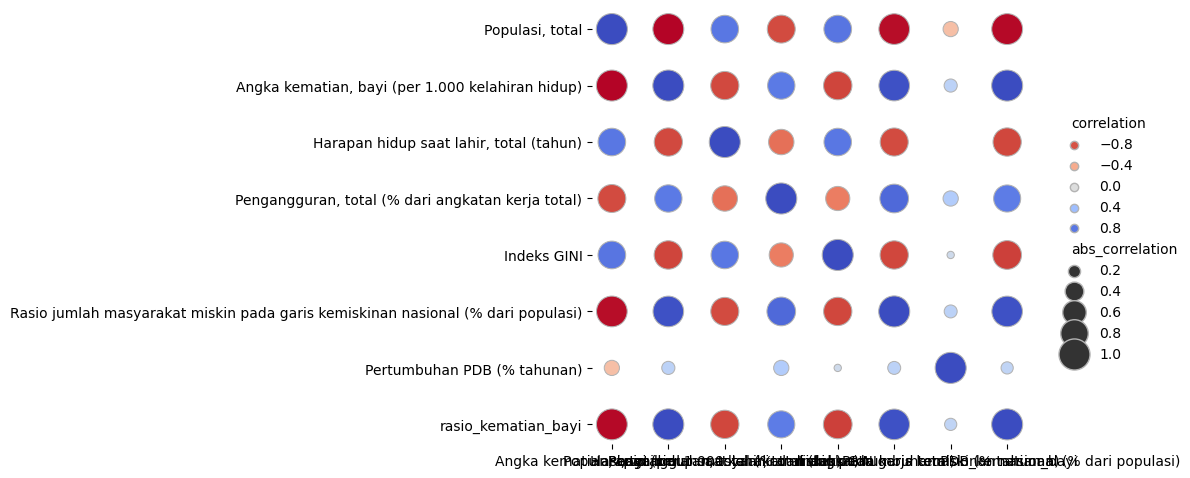

In [481]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="abs_correlation",
    palette="coolwarm_r", hue_norm=(-1, 1), edgecolor=".7",
    height=5, sizes=(0, 500),
)

# Tweak the figure
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

### 2. Visualize population in each provinces

In [137]:
penduduk_prov = pd.read_csv("preprocessed_data\penduduk_per_provinsi_processed.csv")
penduduk_prov.rename(columns={"Provinsi di Indonesia": "Provinsi"}, inplace=True)

with open(r"C:\Users\ThinkPad\OneDrive\Kuliah_Ghana\COURSES\DQLab\CapstoneProject\data_map_indo\indonesia-prov.geojson") as response:
    geo = json.load(response)

In [350]:
# penduduk_prov_df = pd.read_csv("preprocessed_data/penduduk_per_provinsi_processed.csv")

fig = go.Figure(go.Choroplethmapbox(geojson=geo, 
                                    locations=penduduk_prov["Provinsi"], 
                                    featureidkey="properties.Propinsi",
                                    z=penduduk_prov["2022"],
                                    colorscale="YlOrRd", marker_line_width=.3))

fig.update_layout(mapbox_style="carto-positron",
                        height = 400,
                        width = 800,
                        autosize=True,
                        margin={"r":0,"t":0,"l":0,"b":0},
                        paper_bgcolor='#303030',
                        plot_bgcolor='#303030',
                        mapbox=dict(center=dict(lat=0.5893, lon=116.9213), zoom=3.6),
                        )

### 3. Clustering

In [142]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [309]:
cluster_df = pd.read_csv("preprocessed_data\cluster_data.csv")

X = cluster_df.drop(["Provinsi"], axis=1).copy()

quantity_cols = ["Jumlah Rumah Sakit Umum", "Jumlah Rumah Sakit Khusus", "Jumlah Puskesmas Rawat Inap", "Jumlah Puskesmas Non Rawat Inap",
                 "kelurahan_jumlah_sd", "kelurahan_jumlah_smp", "kelurahan_jumlah_sma", "kelurahan_jumlah_smk", "kelurahan_jumlah_pt"]

try:
    for col in quantity_cols:
        X[col] = X[col] / X["Luas Wilayah (km2)"]
except: pass

X.head()

,hb_2022,hk_2022,Indeks Pembangunan Manusia,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,kelurahan_jumlah_sd,kelurahan_jumlah_smp,kelurahan_jumlah_sma,kelurahan_jumlah_smk,kelurahan_jumlah_pt,Persentase Penduduk Miskin - Maret,Luas Wilayah (km2),2022
0,39156.01,26063.50,72.80,0.001104,0.000104,0.003123,0.003071,0.056922,0.023086,0.011940,0.003451,0.001984,14.64,57956.00,5407.9
1,63194.18,37943.83,72.71,0.002672,0.000343,0.002576,0.005755,0.068511,0.031172,0.015182,0.009646,0.002932,8.42,72981.23,15115.2
2,50593.41,32377.51,73.26,0.001166,0.000714,0.002642,0.003927,0.029896,0.018994,0.009688,0.004189,0.002404,5.92,42012.89,5640.6
3,149914.13,80057.79,73.52,0.000678,0.000172,0.001172,0.001482,0.020833,0.013766,0.006987,0.002988,0.000896,6.78,87023.66,2179.8
4,149914.13,80057.79,73.52,0.000678,0.000172,0.001172,0.001482,0.020833,0.013766,0.006987,0.002988,0.000896,6.78,87023.66,6614.4


In [310]:
mm_scaler = MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X.values)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).drop(["Luas Wilayah (km2)"], axis=1)
X_scaled.head()

,hb_2022,hk_2022,Indeks Pembangunan Manusia,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,kelurahan_jumlah_sd,kelurahan_jumlah_smp,kelurahan_jumlah_sma,kelurahan_jumlah_smk,kelurahan_jumlah_pt,Persentase Penduduk Miskin - Maret,2022
0,0.063034,0.075259,0.563179,0.004524,0.001348,0.184493,0.005666,0.136313,0.055578,0.034100,0.009398,0.008797,0.460877,0.096144
1,0.149926,0.145304,0.558736,0.011912,0.004460,0.148849,0.011438,0.166222,0.076824,0.043951,0.028467,0.013264,0.179557,0.295563
2,0.104377,0.112486,0.585884,0.004817,0.009297,0.153152,0.007507,0.066557,0.044826,0.027256,0.011670,0.010775,0.066486,0.100924
3,0.463400,0.393603,0.598717,0.002515,0.002244,0.057375,0.002248,0.043168,0.031090,0.019049,0.007972,0.003671,0.105382,0.029829
4,0.463400,0.393603,0.598717,0.002515,0.002244,0.057375,0.002248,0.043168,0.031090,0.019049,0.007972,0.003671,0.105382,0.120929


In [468]:
kmeanModel = KMeans(n_clusters=5, random_state=42)
y=kmeanModel.fit(X_scaled).labels_

cluster_df_res = pd.concat([cluster_df, pd.DataFrame(y, columns=["no_cluster"])], axis=1)

In [469]:
# penduduk_prov_df = pd.read_csv("preprocessed_data/penduduk_per_provinsi_processed.csv")

fig = go.Figure(go.Choroplethmapbox(geojson=geo, 
                                    locations=cluster_df_res["Provinsi"], 
                                    featureidkey="properties.Propinsi",
                                    z=cluster_df_res["no_cluster"],
                                    colorscale="YlOrRd", marker_line_width=.3))

fig.update_layout(mapbox_style="carto-positron",
                        height = 400,
                        width = 800,
                        autosize=True,
                        margin={"r":0,"t":0,"l":0,"b":0},
                        paper_bgcolor='#303030',
                        plot_bgcolor='#303030',
                        mapbox=dict(center=dict(lat=0.5893, lon=116.9213), zoom=3.6),
                        )

In [470]:
cluster_df_res.groupby("no_cluster").mean()

,hb_2022,hk_2022,Indeks Pembangunan Manusia,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,kelurahan_jumlah_sd,kelurahan_jumlah_smp,kelurahan_jumlah_sma,kelurahan_jumlah_smk,kelurahan_jumlah_pt,Persentase Penduduk Miskin - Maret,Luas Wilayah (km2),2022
no_cluster,,,,,,,,,,,,,,,
0,62968.074667,37088.988000,71.923333,54.800000,11.666667,108.066667,153.200000,1936.266667,980.866667,430.333333,213.866667,71.333333,7.772667,56372.653333,5304.480000
1,298359.970000,182908.690000,81.650000,141.000000,51.000000,6.000000,309.000000,260.000000,254.000000,219.000000,216.000000,141.000000,4.690000,664.010000,10680.000000
2,52517.492000,34557.686000,74.524000,204.600000,51.400000,275.000000,384.000000,4939.400000,2839.400000,1339.200000,1119.200000,276.000000,9.374000,25755.602000,28720.420000
3,182285.020000,95669.090000,74.077500,43.500000,10.250000,81.000000,95.000000,1231.500000,771.250000,377.000000,174.250000,53.750000,6.660000,94645.415000,3345.450000
4,41704.547778,26708.806667,68.283333,32.444444,2.333333,95.555556,139.444444,1579.555556,726.222222,323.777778,146.111111,50.666667,17.113333,71346.136667,3171.433333


In [467]:
cluster_df_res[cluster_df_res["Provinsi"] == "JAWA TIMUR"]

,Provinsi,hb_2022,hk_2022,Indeks Pembangunan Manusia,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,kelurahan_jumlah_sd,kelurahan_jumlah_smp,kelurahan_jumlah_sma,kelurahan_jumlah_smk,kelurahan_jumlah_pt,Persentase Penduduk Miskin - Maret,Luas Wilayah (km2),2022,no_cluster
14,JAWA TIMUR,66364.73,42717.44,72.75,302.0,90.0,575.0,393.0,8362.0,4752.0,2476.0,1642.0,448.0,10.38,47803.49,41150.0,2


### 4. Plot Productive vs Non-Productive Age Range

In [434]:
umur_df = pd.read_csv("preprocessed_data/data_klasifikasi_umur.csv")
umur_df["tahun"] = umur_df["tahun"].astype(str)
used_cols = ["usia_dibawah_15", "usia_produktif", "usia_diatas_60"]

umur_18 = umur_df[umur_df["tahun"] == "2018"][used_cols].values[0]
umur_22 = umur_df[umur_df["tahun"] == "2022"][used_cols].values[0]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

night_colors = ['rgb(206, 75, 26)', 'rgb(243, 190, 44)', 'rgb(234, 135, 26)']
labels = ["Usia < 15 tahun", "Usia 15-60 tahun", "Usia > 60 tahun"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['1980', '2007'])
fig.add_trace(go.Pie(labels=labels, values=umur_18, name="GHG Emissions", marker_colors=night_colors),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=umur_22, name="CO2 Emissions"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(height=375, width=600,margin={"r":0,"t":0,"l":0,"b":0},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2018', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='2022', x=0.82, y=0.5, font_size=15, showarrow=False)])
fig.show()

### 5. Barplot Worlwide Total Population

In [413]:
population_df = pd.read_csv("preprocessed_data/peringkat_total_penduduk_dunia.csv").iloc[:5, :].sort_values(by=["total_penduduk"], ascending=False)
population_df.head()

,negara,tahun,total_penduduk
3,China,2021,1.412360e+09
4,India,2021,1.407564e+09
2,United States,2021,3.318937e+08
0,Indonesia,2021,2.737532e+08
1,Pakistan,2021,2.314021e+08


In [391]:
fig_barplot = go.Figure(data=[
    go.Bar(y=population_df["negara"], x=population_df["total_penduduk"],
        marker=dict(
        color='rgba(170, 50, 20, 0.6)',
        line=dict(
            color='rgba(170, 50, 20, 1.0)',
            width=1),
    ),
    orientation='h')
])
fig_barplot.update_layout(yaxis=dict(autorange="reversed"), width=800)
fig_barplot.show()